# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        #response = requests.get(f"{url}&q={city}").json()
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Add to record 
        record= record + 1
        
        # Loop does not over exceed one second rate limit of API
        time.sleep(1.01)
        
    # Skip to next call if no record found
    except:
        print("City not found. Skipping...")
    continue
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Flateby
Processing Record 2 | Cape Town
Processing Record 3 | Alexandria
Processing Record 4 | Qaanaaq
Processing Record 5 | Barrow
Processing Record 6 | Yoichi
Processing Record 7 | Nikolskoye
Processing Record 8 | Rawson
Processing Record 9 | Juegang
Processing Record 10 | Paamiut
Processing Record 11 | Longyearbyen
Processing Record 12 | Chokurdakh
Processing Record 13 | Cabedelo
Processing Record 14 | Punta Arenas
Processing Record 15 | Palana
Processing Record 16 | Rikitea
Processing Record 17 | Tigzirt
Processing Record 18 | Altay
City not found. Skipping...
Processing Record 19 | Hobart
City not found. Skipping...
Processing Record 20 | Yellowknife
Processing Record 21 | Port Alfred
Processing Record 22 | Los Llanos de Aridane
Processing Record 23 | Dingle
Processing Record 24 | Talnakh
Processing Record 25 | Hofn
Processing Record 26 | Cidreira
Processing Record 27 | New Norfolk
Processing Record 28 

Processing Record 227 | Chita
Processing Record 228 | Obo
Processing Record 229 | Atherton
Processing Record 230 | Caravelas
Processing Record 231 | Port Blair
Processing Record 232 | Kodiak
Processing Record 233 | Guerrero Negro
Processing Record 234 | Hervey Bay
Processing Record 235 | Tignere
Processing Record 236 | Igboho
Processing Record 237 | Pevek
Processing Record 238 | Richards Bay
Processing Record 239 | Touros
Processing Record 240 | Xingyi
Processing Record 241 | Poum
Processing Record 242 | Manggar
Processing Record 243 | Pangkalanbuun
City not found. Skipping...
Processing Record 244 | Novikovo
Processing Record 245 | Coquimbo
Processing Record 246 | Isangel
Processing Record 247 | Tulsipur
Processing Record 248 | Namibe
Processing Record 249 | Lubango
Processing Record 250 | Erzin
Processing Record 251 | Sola
Processing Record 252 | Bahia Honda
Processing Record 253 | Khani
Processing Record 254 | Provideniya
Processing Record 255 | Kruisfontein
Processing Record 256 | 

Processing Record 454 | Jinchang
City not found. Skipping...
Processing Record 455 | Havre-Saint-Pierre
Processing Record 456 | Thinadhoo
Processing Record 457 | Kavieng
Processing Record 458 | Merrill
Processing Record 459 | Mehamn
Processing Record 460 | Seymchan
City not found. Skipping...
Processing Record 461 | Ulladulla
Processing Record 462 | Yinchuan
Processing Record 463 | Kalmunai
Processing Record 464 | Kon Tum
Processing Record 465 | Monte Alegre de Sergipe
Processing Record 466 | Leningradskiy
Processing Record 467 | Coihaique
Processing Record 468 | Tessalit
Processing Record 469 | Sopron
City not found. Skipping...
City not found. Skipping...
Processing Record 470 | Lebanon
Processing Record 471 | Nhulunbuy
Processing Record 472 | Juneau
Processing Record 473 | Vuktyl
City not found. Skipping...
Processing Record 474 | Kotelnich
Processing Record 475 | Margate
Processing Record 476 | Cayenne
Processing Record 477 | Sayyan
Processing Record 478 | Ludvika
Processing Record

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create dictonary
table_dict = {'City': city_name,
              'Cloudiness': cloudiness,
              'Country': country,
              'Date': date,
              'Humidity': humidity,
              'Lat': lat,
              'Lng': lng,
              'Max Temp': max_temp,
              'Wind Speed': wind_speed
             }

#Display as DataFrame
weather_data_df = pd.DataFrame(table_dict)
weather_data_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [8]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Flateby,90,NO,1547956200,92,59.83,11.15,21.20,4.70
1,Cape Town,0,ZA,1547953200,71,-33.93,18.42,53.60,3.36
2,Alexandria,90,US,1547956440,69,31.31,-92.44,37.40,6.93
3,Qaanaaq,0,GL,1547957377,100,77.48,-69.36,-26.15,11.77
4,Barrow,0,AR,1547957378,62,-38.31,-60.23,67.46,14.23


In [9]:
out = pd.DataFrame.from_records(weather_data_df)
out.head()

out.to_csv("weatherdata.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

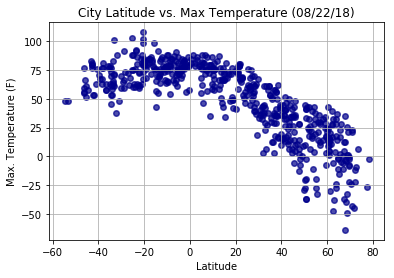

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", s=30, color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Max Temp vs Lat.png")

# Show plot
plt.show()

In [11]:
In [34]: weather_data_df.loc[weather_data_df['Max Temp'].idxmax()]

City           Mount Isa
Cloudiness             0
Country               AU
Date          1547955000
Humidity              14
Lat               -20.73
Lng               139.49
Max Temp           107.6
Wind Speed         18.34
Name: 359, dtype: object

#### Latitude vs. Humidity Plot

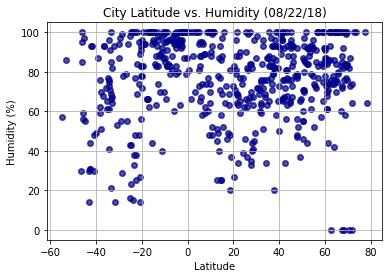

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o", s=30, color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Humidity vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

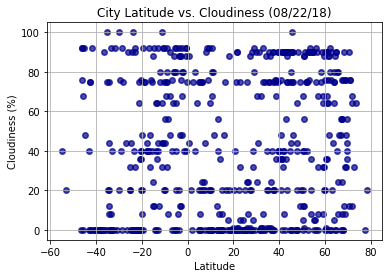

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", s=30,  color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Cloudiness vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

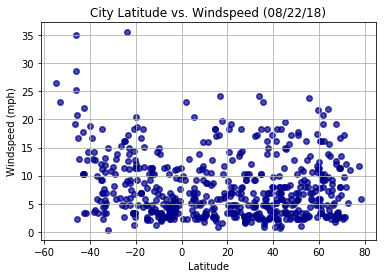

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", s=30,  color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Windspeed (08/22/18)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Windspeed vs Lat.png")

# Show plot
plt.show()

In [ ]:
#three observable trends based on the data
#1. The farther south you head from equator, the colder the temperature.
#2. The highest temperature is located around the Tropic of Cancer.
#3. The most humid region is between the Tropic of Cancer and the Equator.